## EDA esercizio
<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/EDA2.jpg" width=800 >


# TIPS

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

tips = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tips.csv')
tips.to_excel("tips.xlsx")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


A data frame with 244 observations on the following 8 variables.


**total_bill:** a numeric vector, the bill amount (dollars)

**tip:**a numeric vector, the tip amount (dollars)

**sex:** factor with levels Female Male, gender of the payer of the bill

**smoker:** factor with levels No Yes, whether the party included smokers

**day:** factor with levels Friday Saturday Sunday Thursday, day of the week

**time:** factor with levels Day Night, rough time of day

**size:** numeric vector, number of people in party

In [3]:
# sns.set()
# tips = sns.load_dataset("tips")
# tips.head()

In [4]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
tips.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [7]:
tips['smoker'].value_counts(normalize=False)

,count
smoker,
No,151
Yes,93


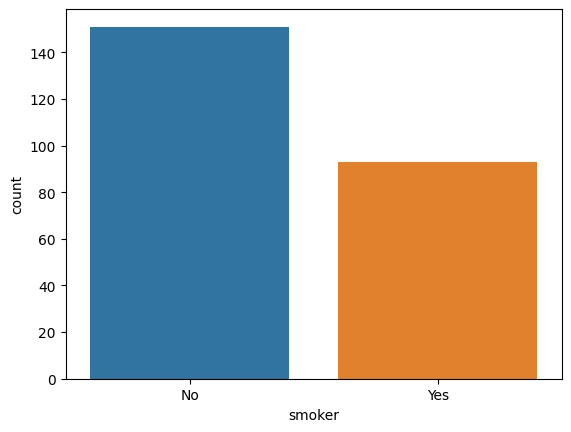

In [8]:
sns.countplot(x='smoker',data=tips,hue='smoker');

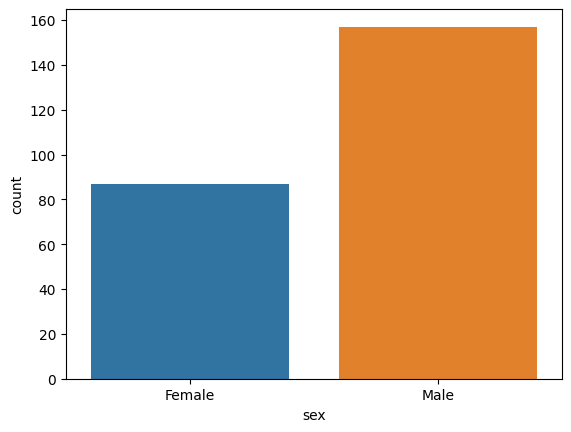

In [9]:
sns.countplot(x='sex',data=tips,hue='sex');

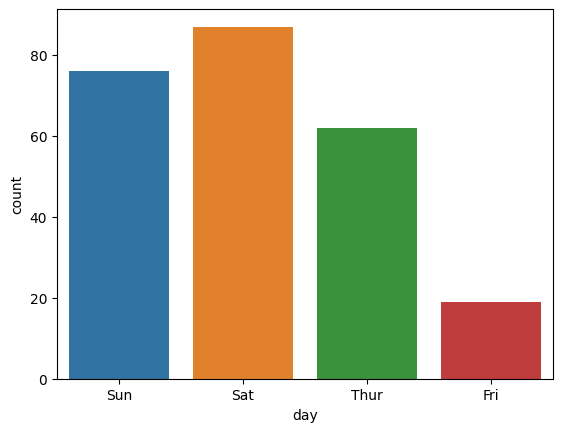

In [10]:
sns.countplot(x='day',data=tips,hue='day');

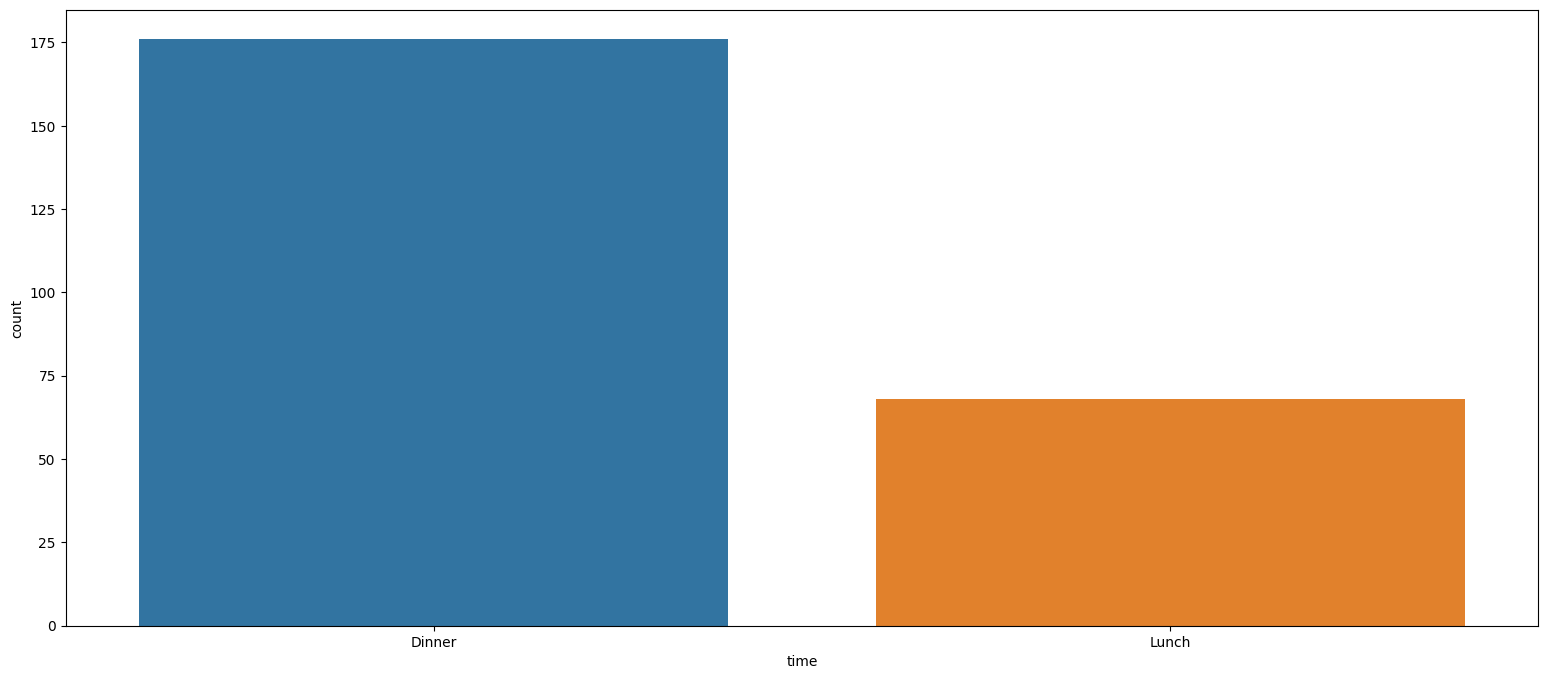

In [11]:
plt.figure(figsize=(19,8))
sns.countplot(x='time',data=tips,hue='time');

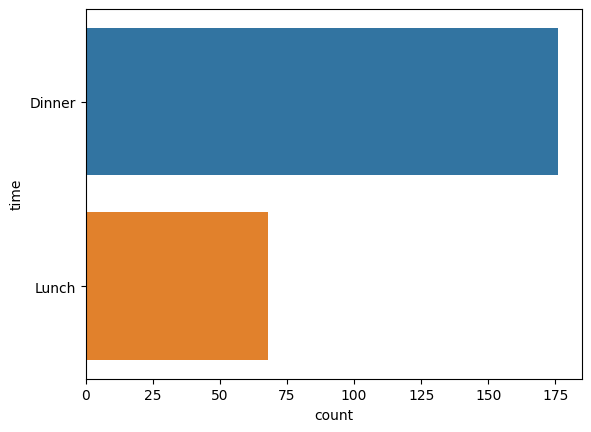

In [12]:
sns.countplot(y='time',data=tips,hue='time');

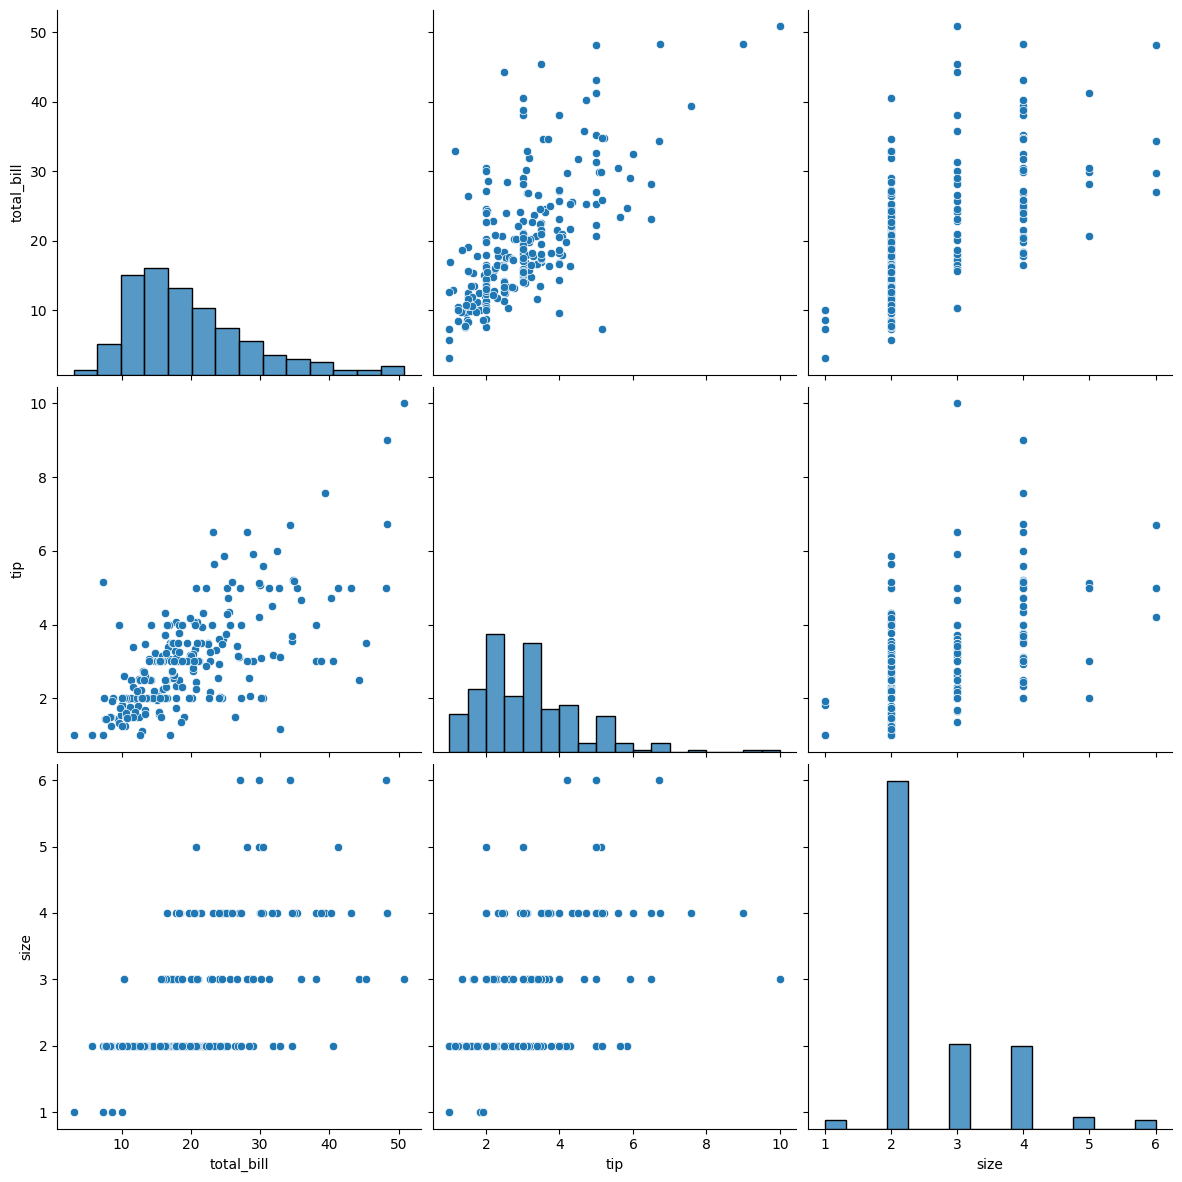

In [13]:
sns.pairplot(tips,height=4,corner=False)

In [14]:
## Categorical = 'sex', 'smoker' , 'day', 'time' , 'size'

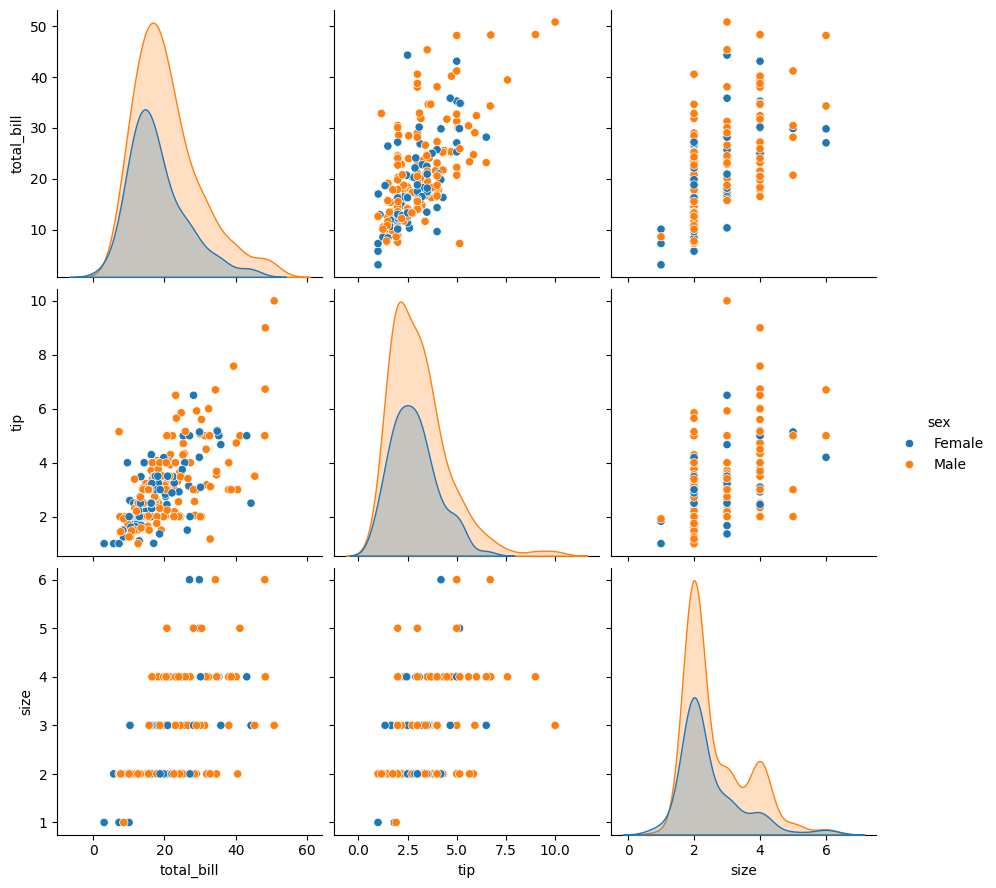

In [15]:
sns.pairplot(tips,height=3,hue='sex');

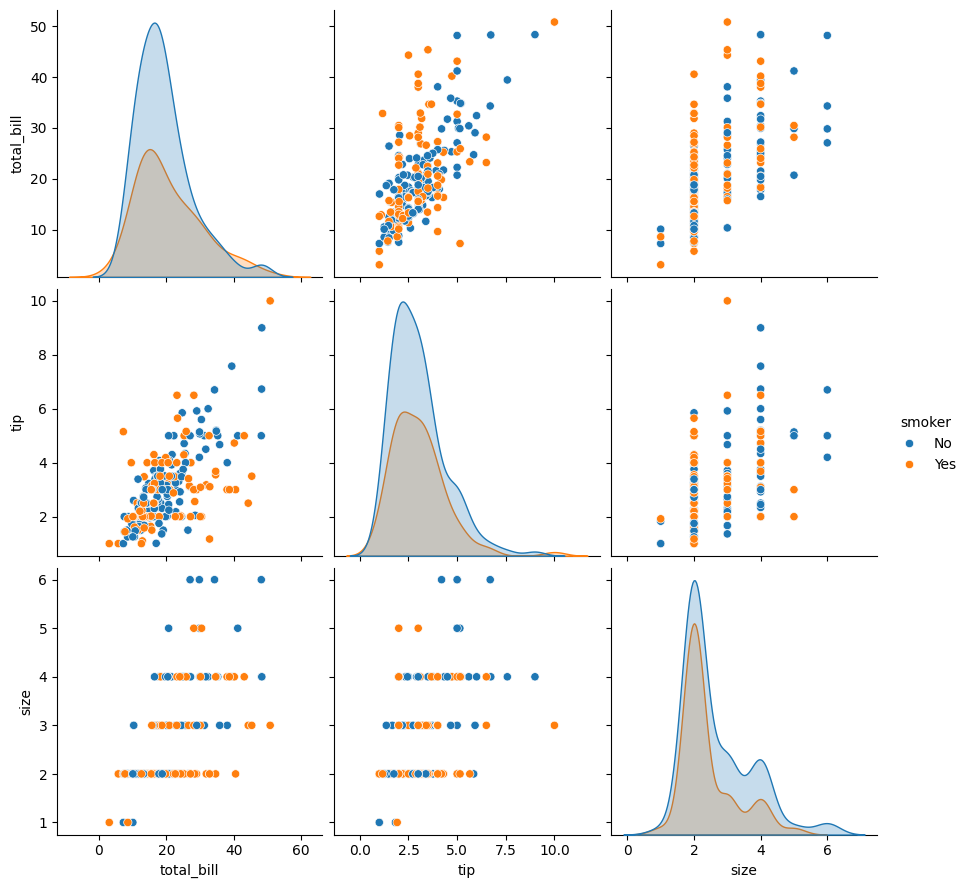

In [16]:
sns.pairplot(tips,height=3,hue='smoker');

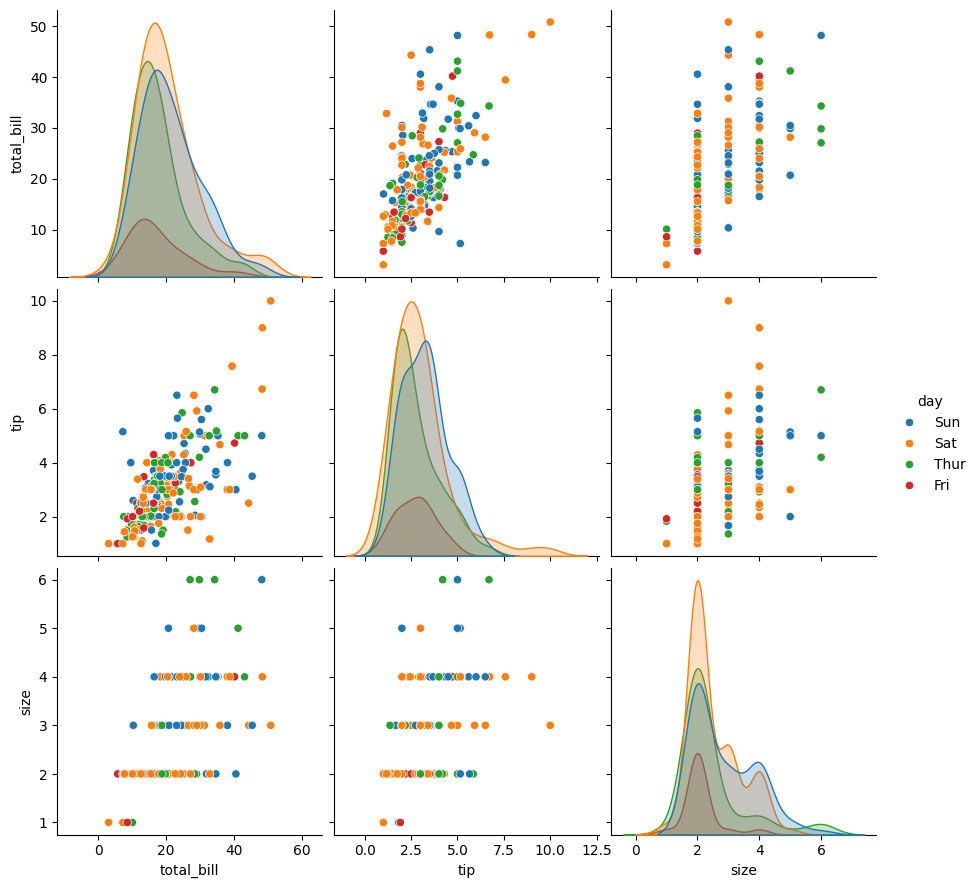

In [17]:
sns.pairplot(tips,height=3,hue='day');

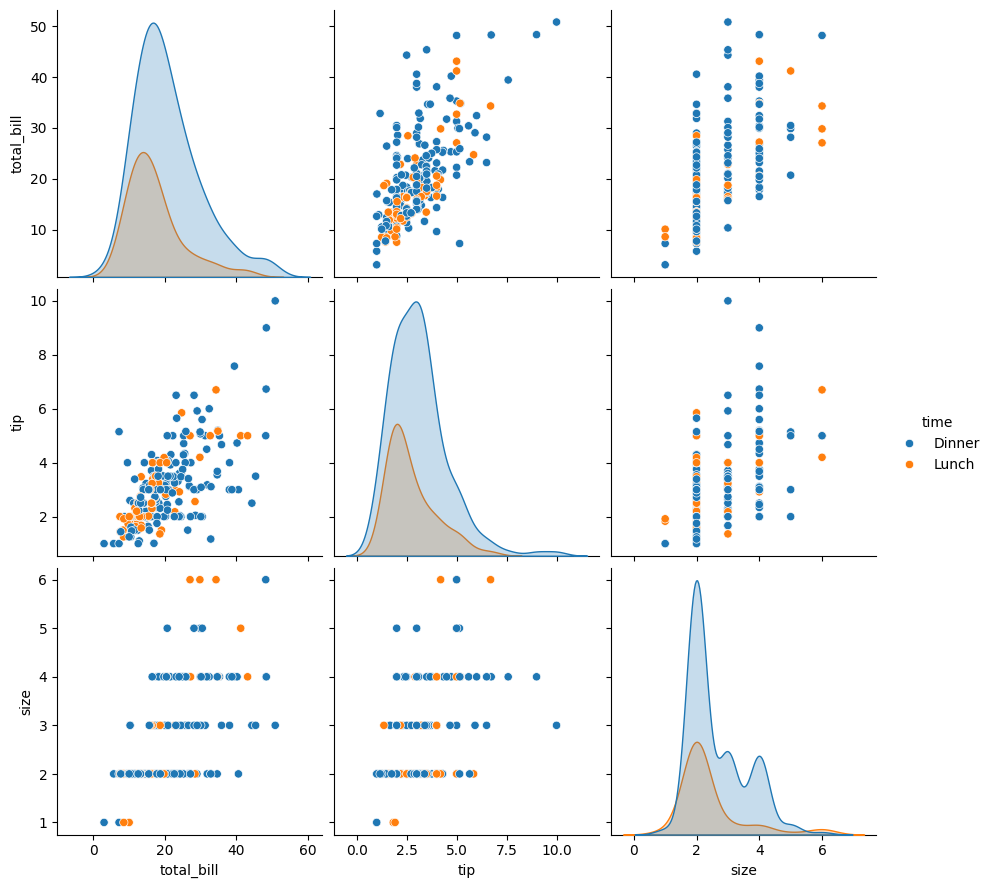

In [18]:
sns.pairplot(tips,height=3,hue='time');

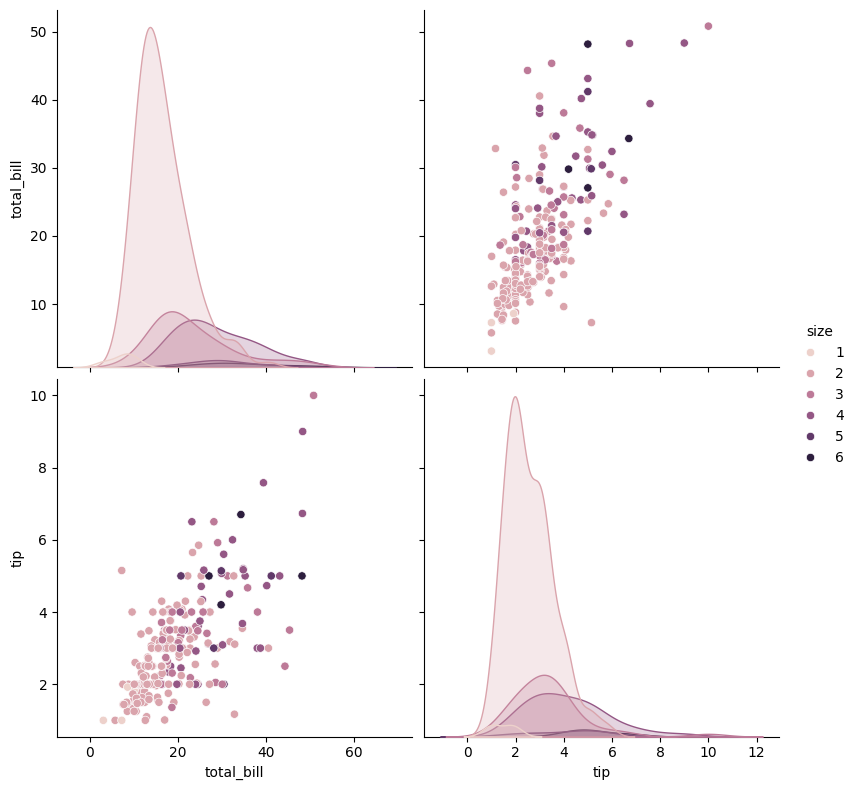

In [19]:
sns.pairplot(tips,height=4,hue='size');

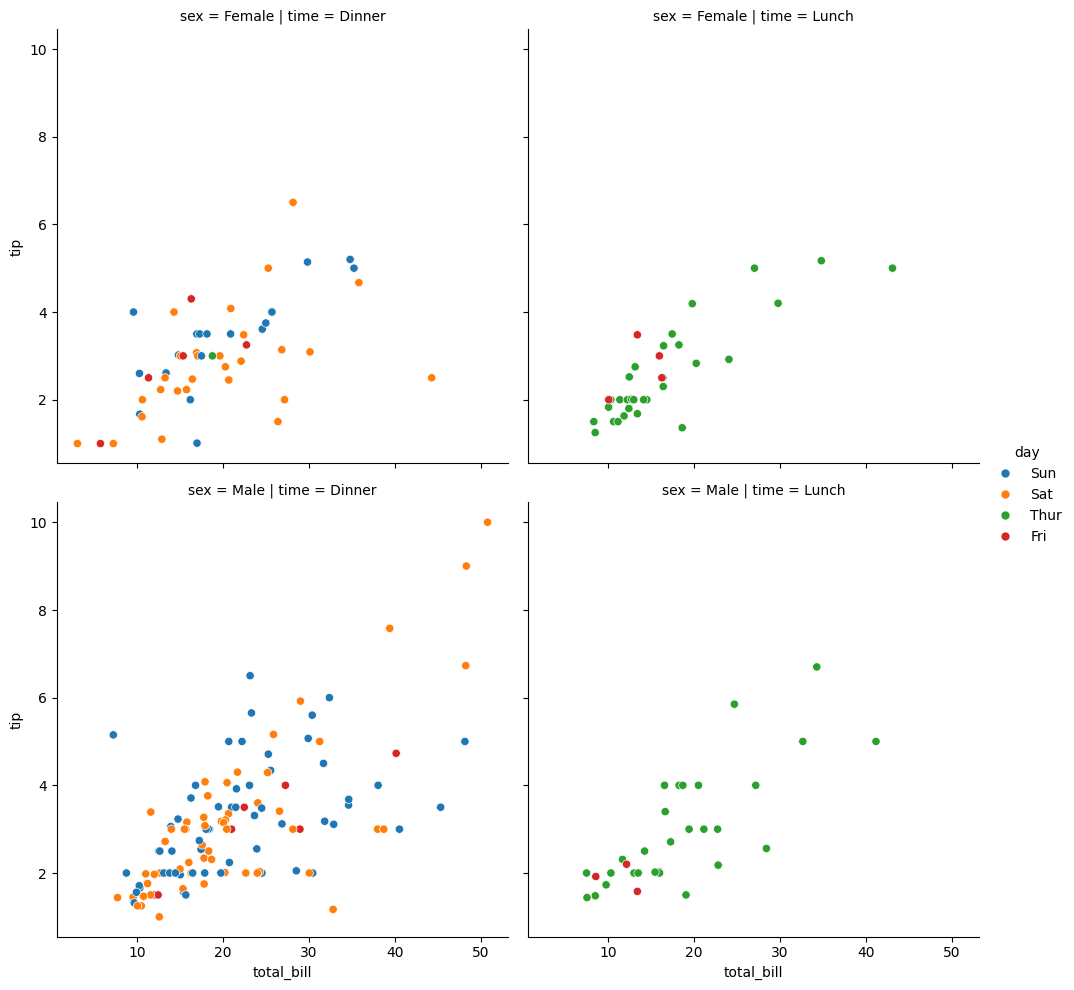

In [20]:

sns.relplot(x="total_bill", y="tip", hue="day",
                col="time", row="sex", data=tips);

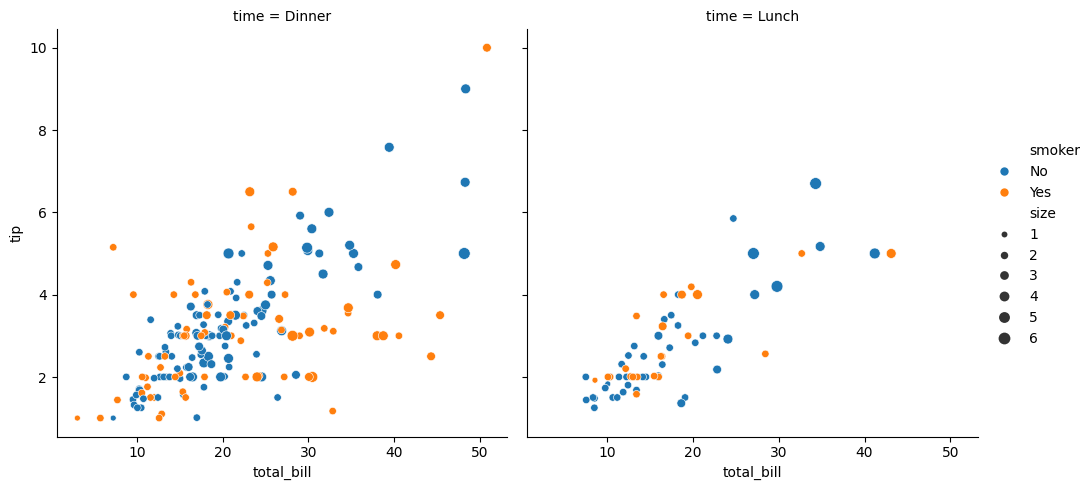

In [21]:
sns.relplot(x="total_bill", y="tip", col="time",hue="smoker", size="size",
            data=tips);

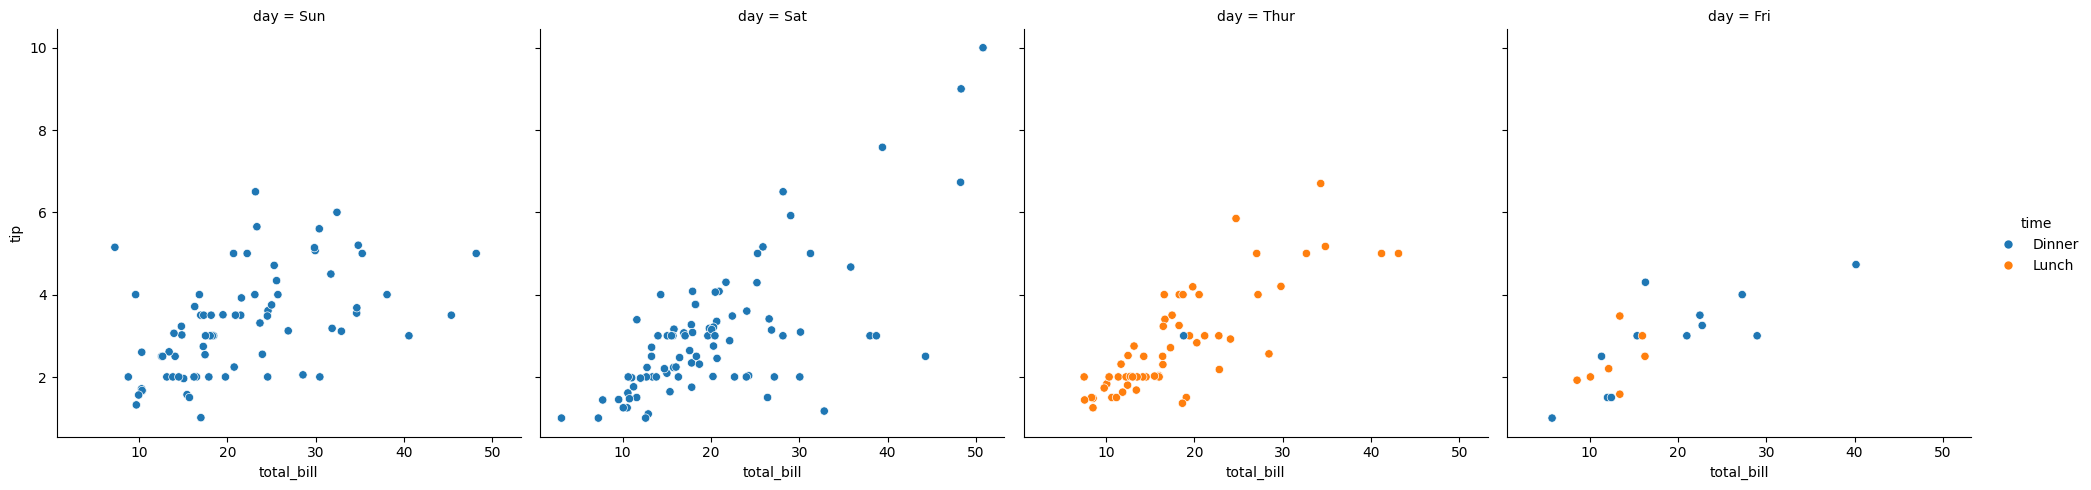

In [22]:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", data=tips)

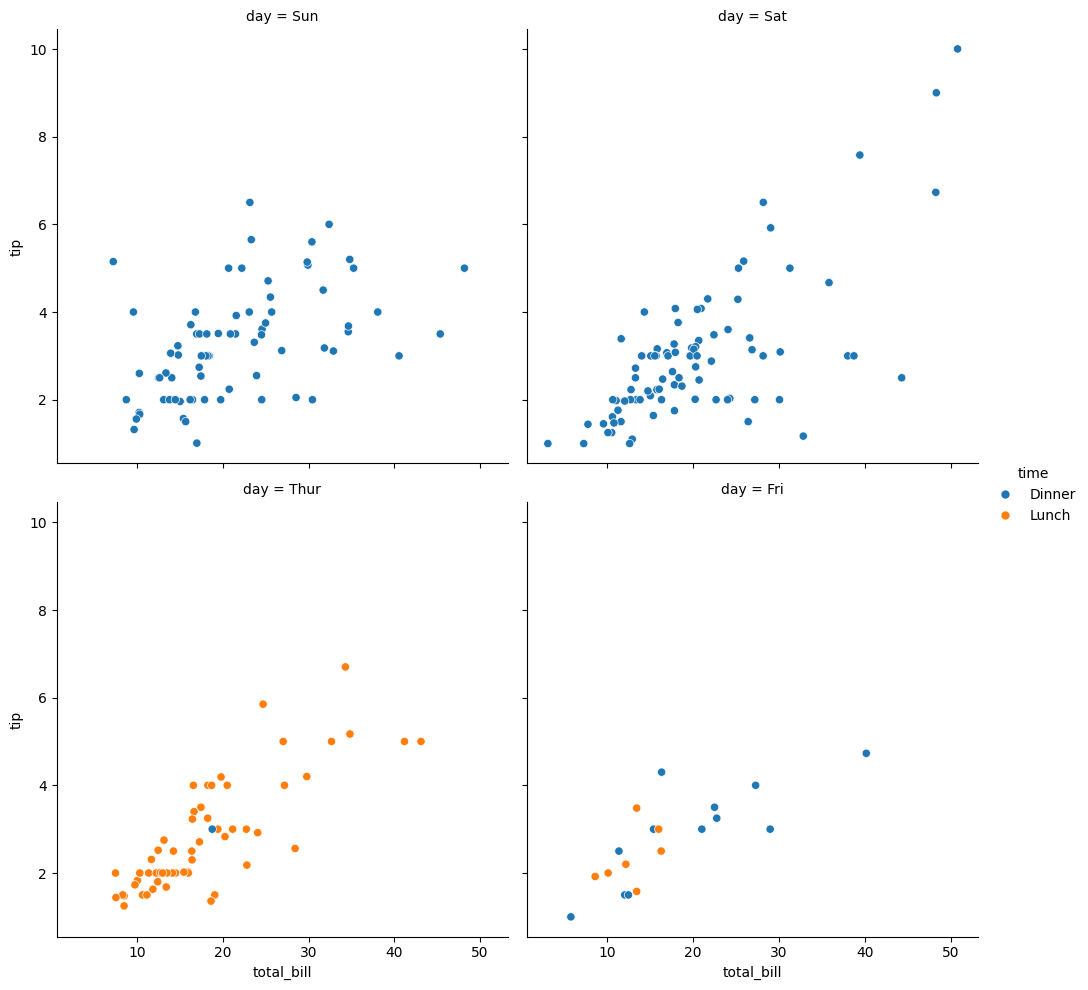

In [23]:
sns.relplot(x="total_bill", y="tip", hue="time",col="day", col_wrap=2, data=tips)

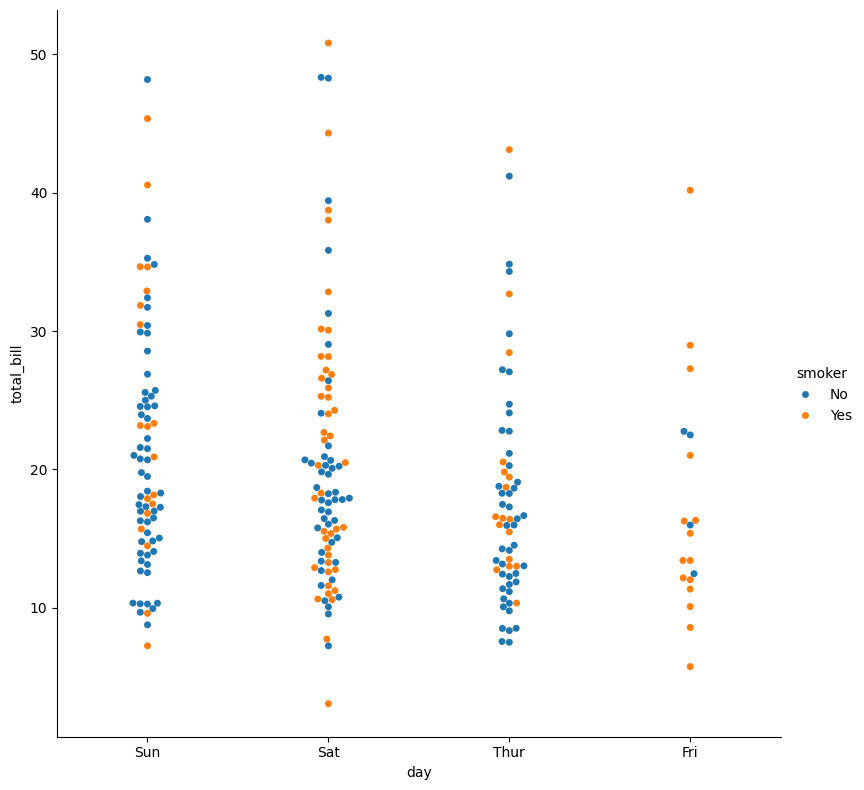

In [24]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="swarm", data=tips,
            height=8, aspect=1);

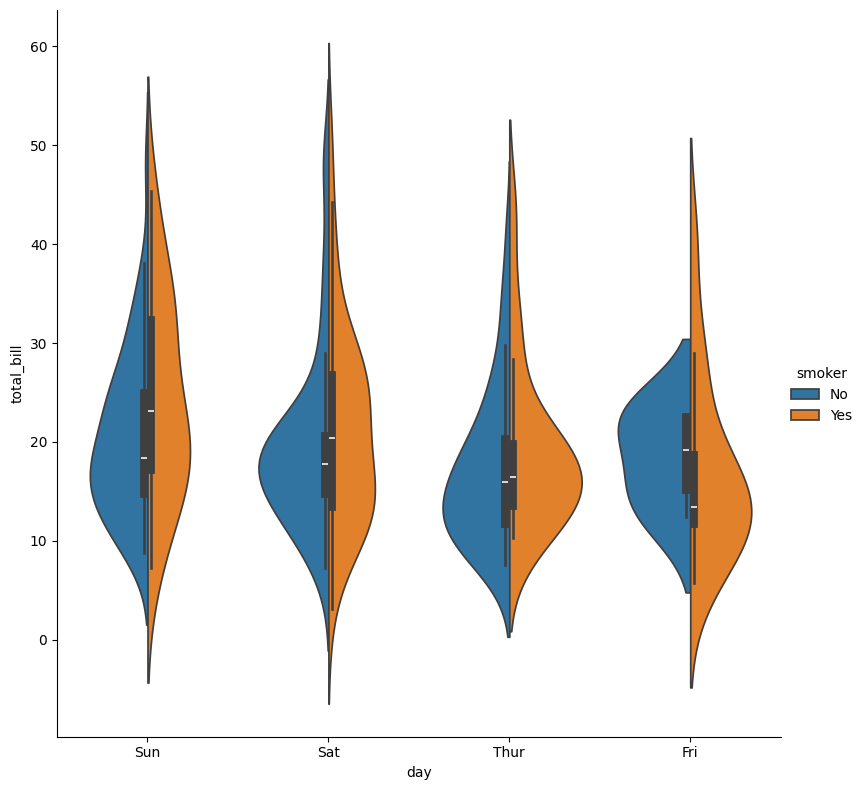

In [25]:
sns.catplot(x="day", y="total_bill", hue="smoker",kind="violin", split=True, data=tips,
            height=8,aspect=1);

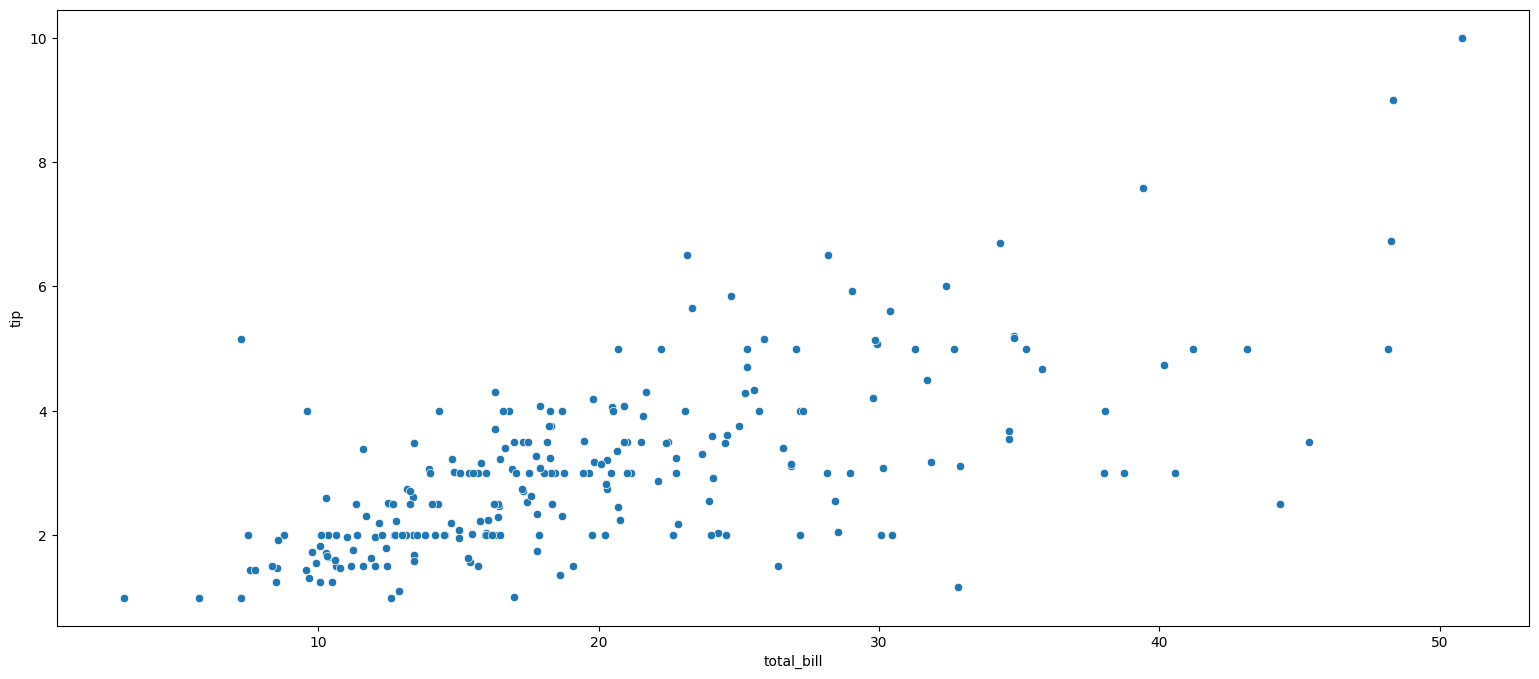

In [26]:
plt.figure(figsize=(19,8))
sns.scatterplot(x="total_bill", y="tip", data=tips);

<ipython-input-27-dd33ada12aae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip']);


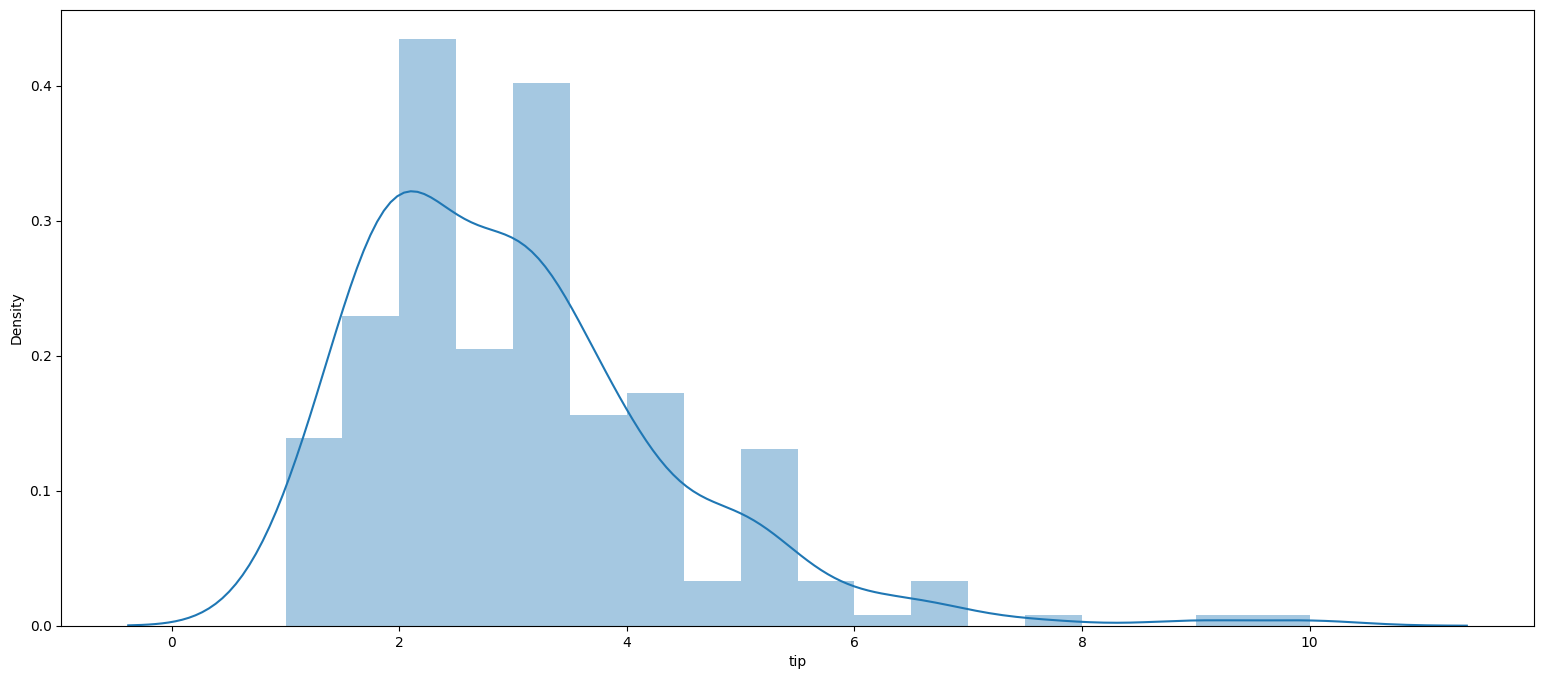

In [27]:
plt.figure(figsize=(19,8))
sns.distplot(tips['tip']);

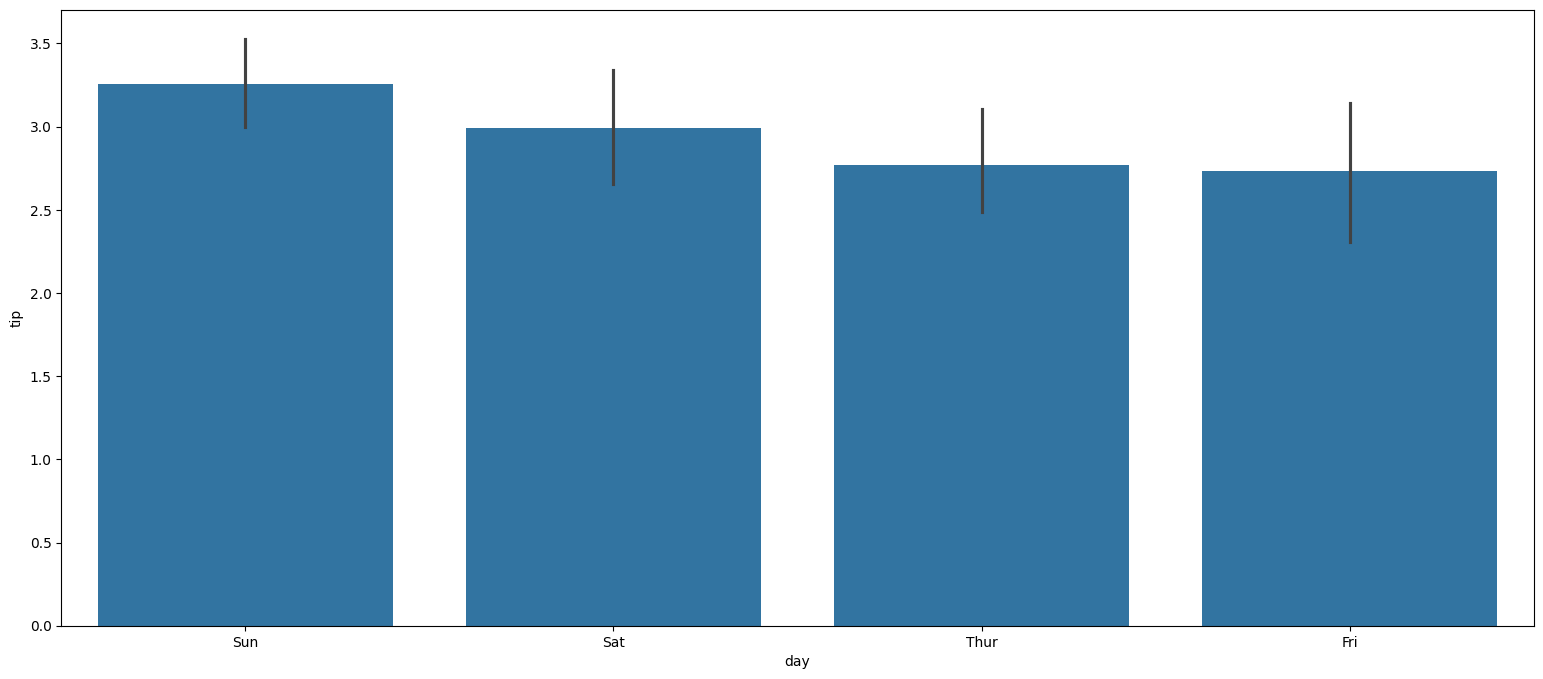

In [28]:
plt.figure(figsize=(19,8))
sns.barplot(x="day", y="tip", data = tips);

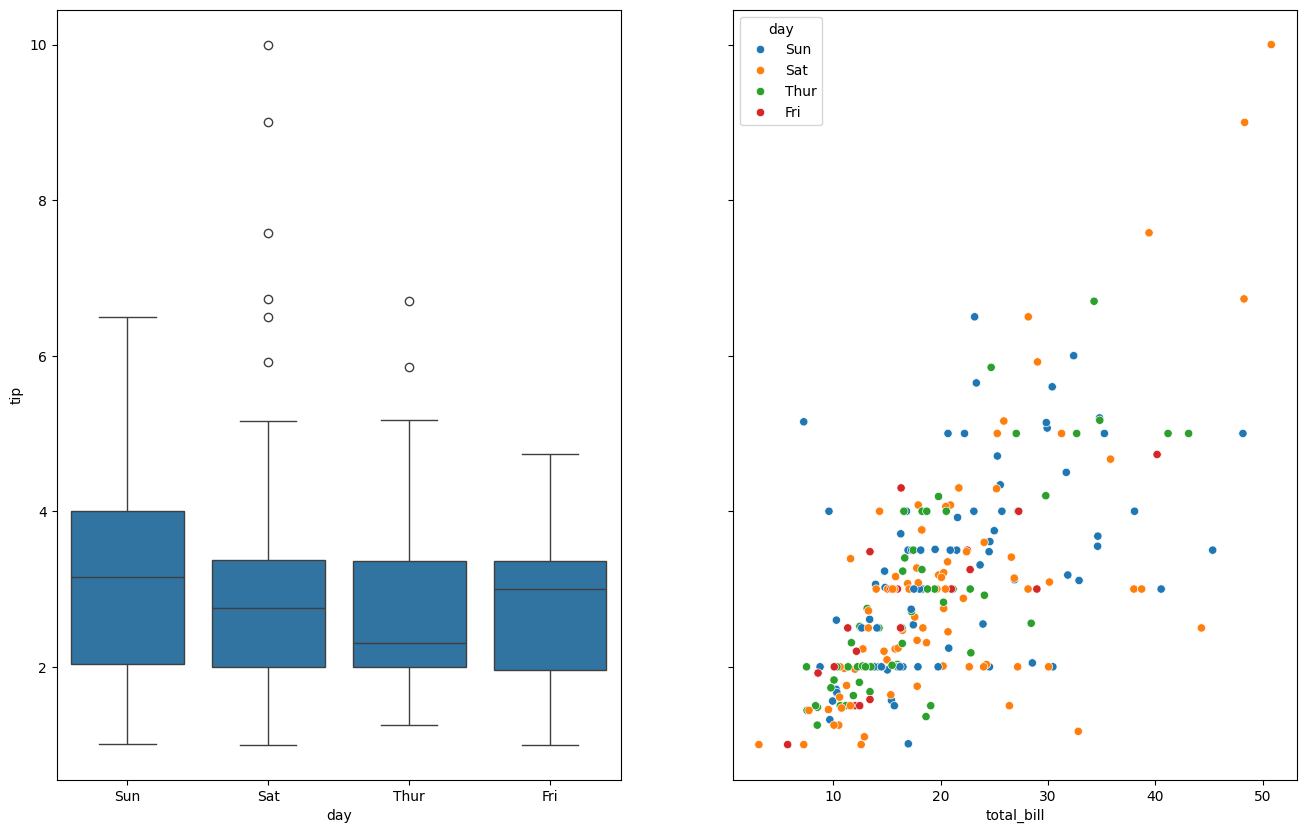

In [29]:
fig,ax =plt.subplots(1, 2, sharey=True, figsize=(16, 10))

sns.boxplot(x="day", y="tip", data=tips, ax=ax[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=ax[1]);

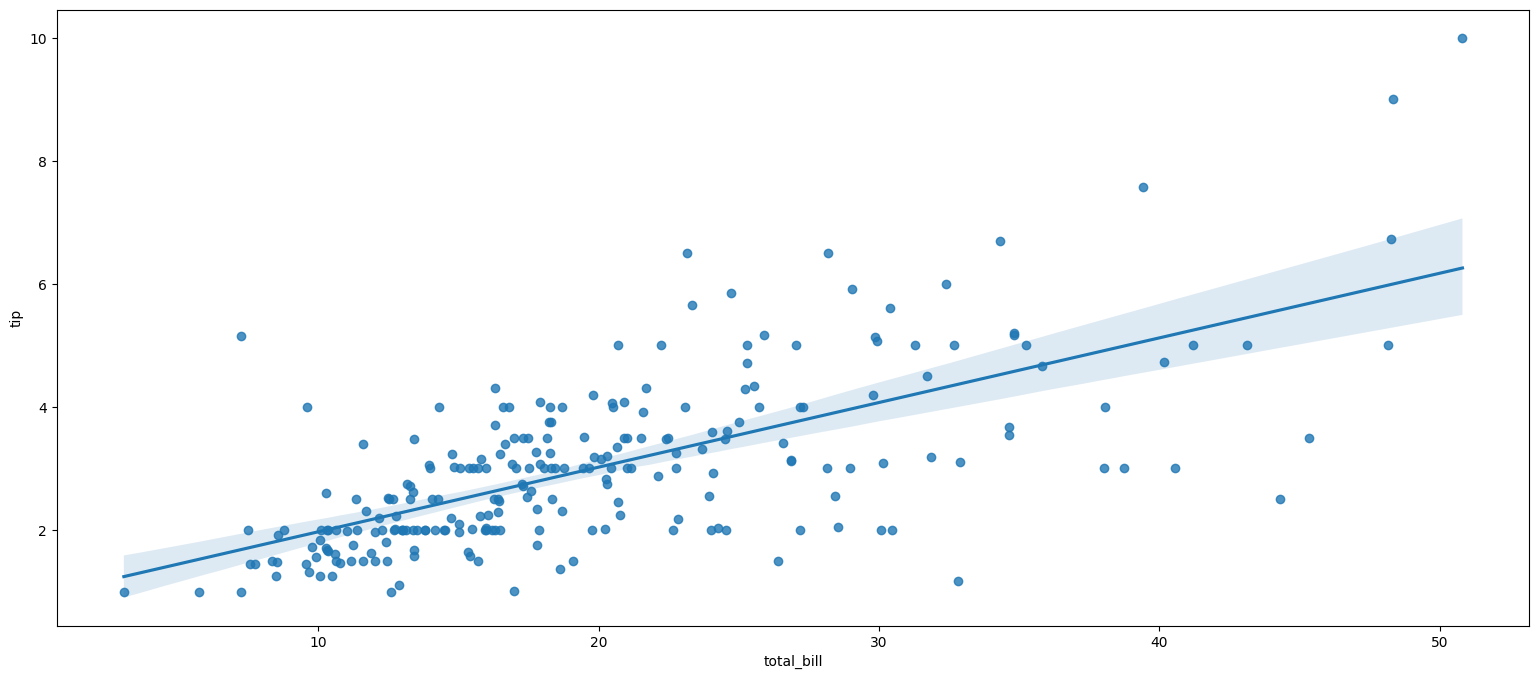

In [30]:
plt.figure(figsize=(19,8))
sns.regplot(x="total_bill", y="tip", data=tips);

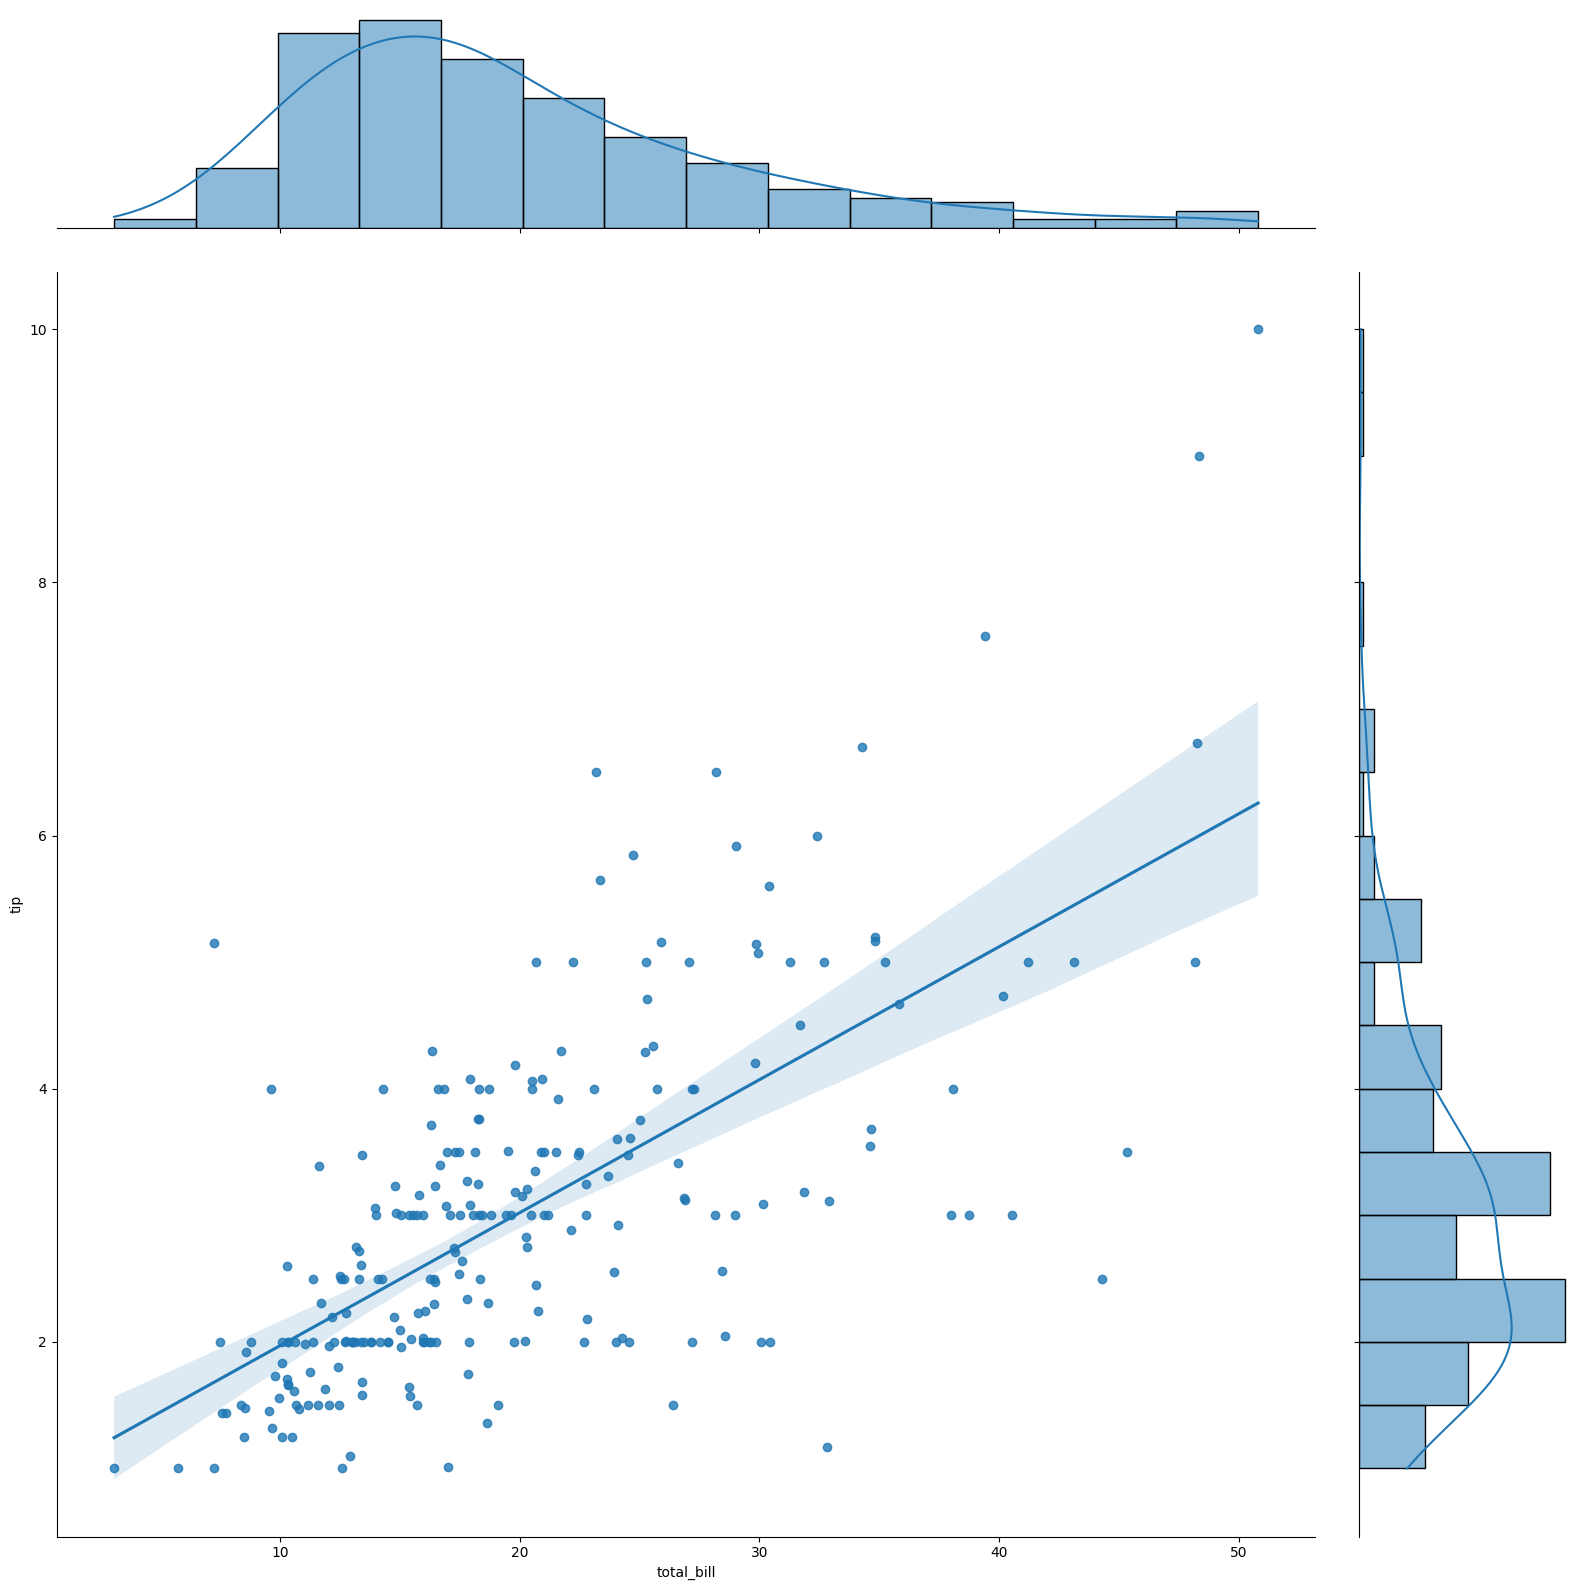

In [31]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg',height=16)


In [32]:
corr = tips.corr(numeric_only=True)
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


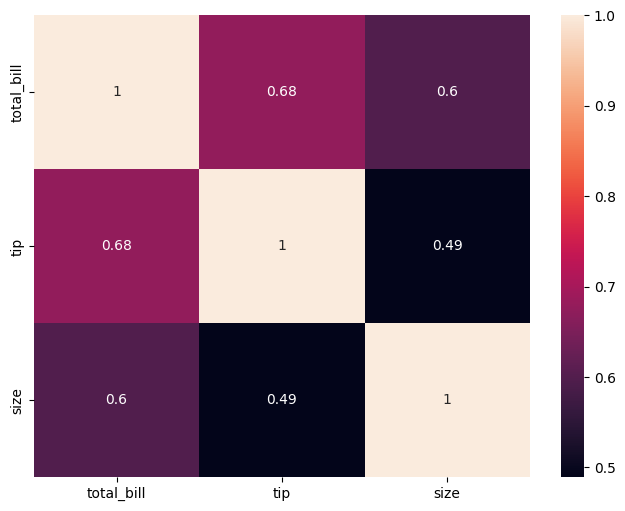

In [33]:
plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot = True);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


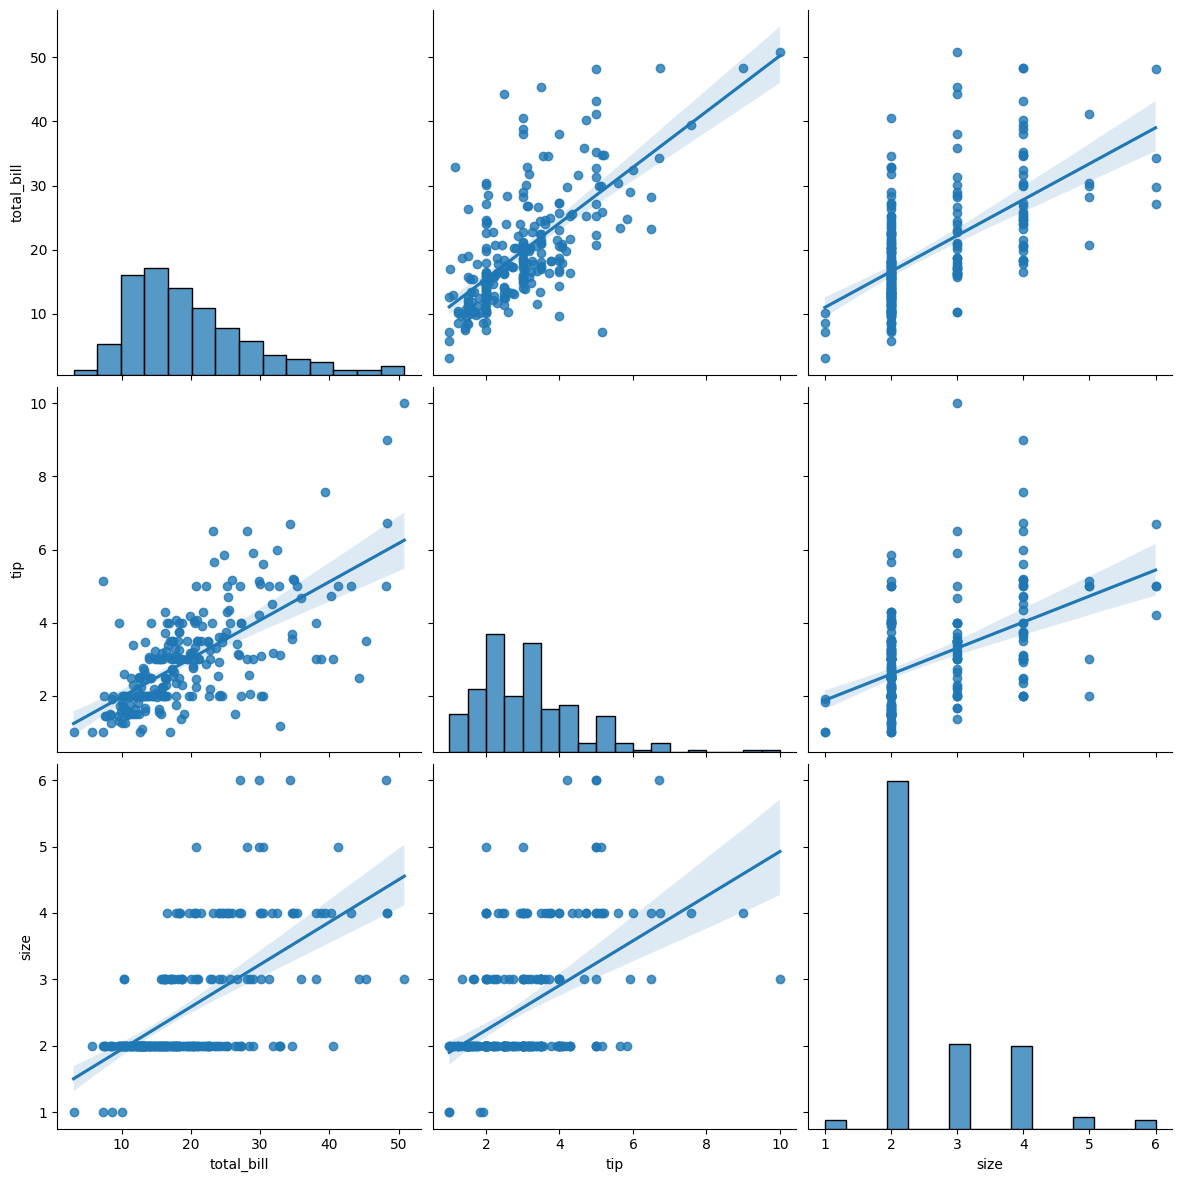

In [34]:
sns.pairplot(data=tips,kind="reg", size=4);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


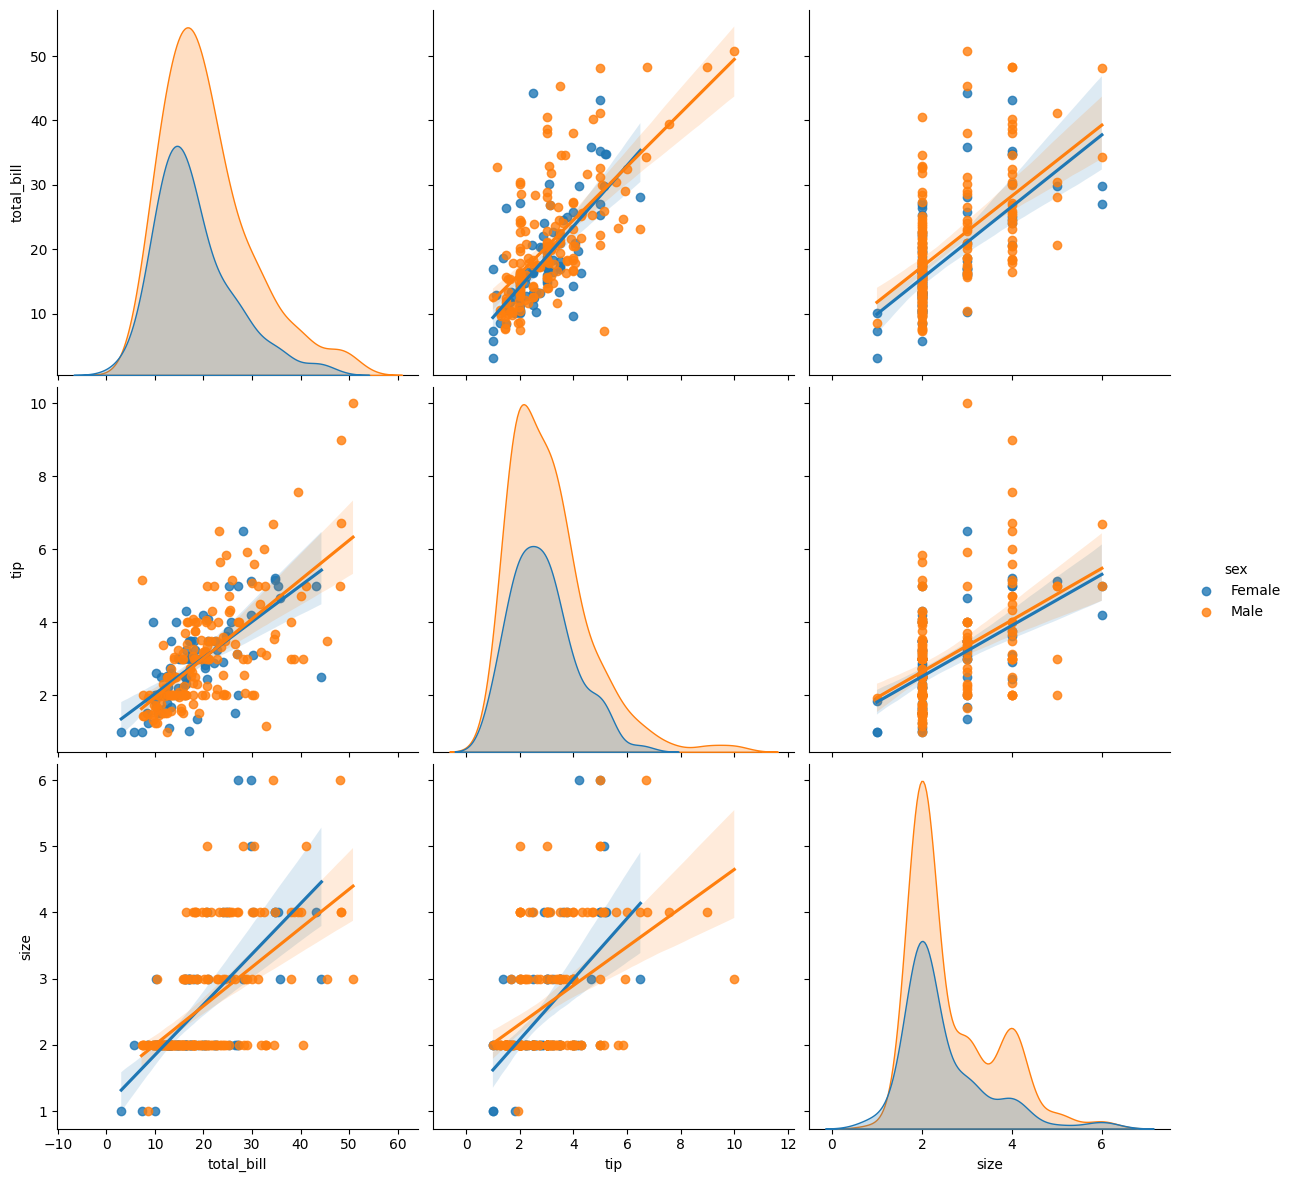

In [35]:
sns.pairplot(data=tips,kind="reg", size=4, hue="sex");

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


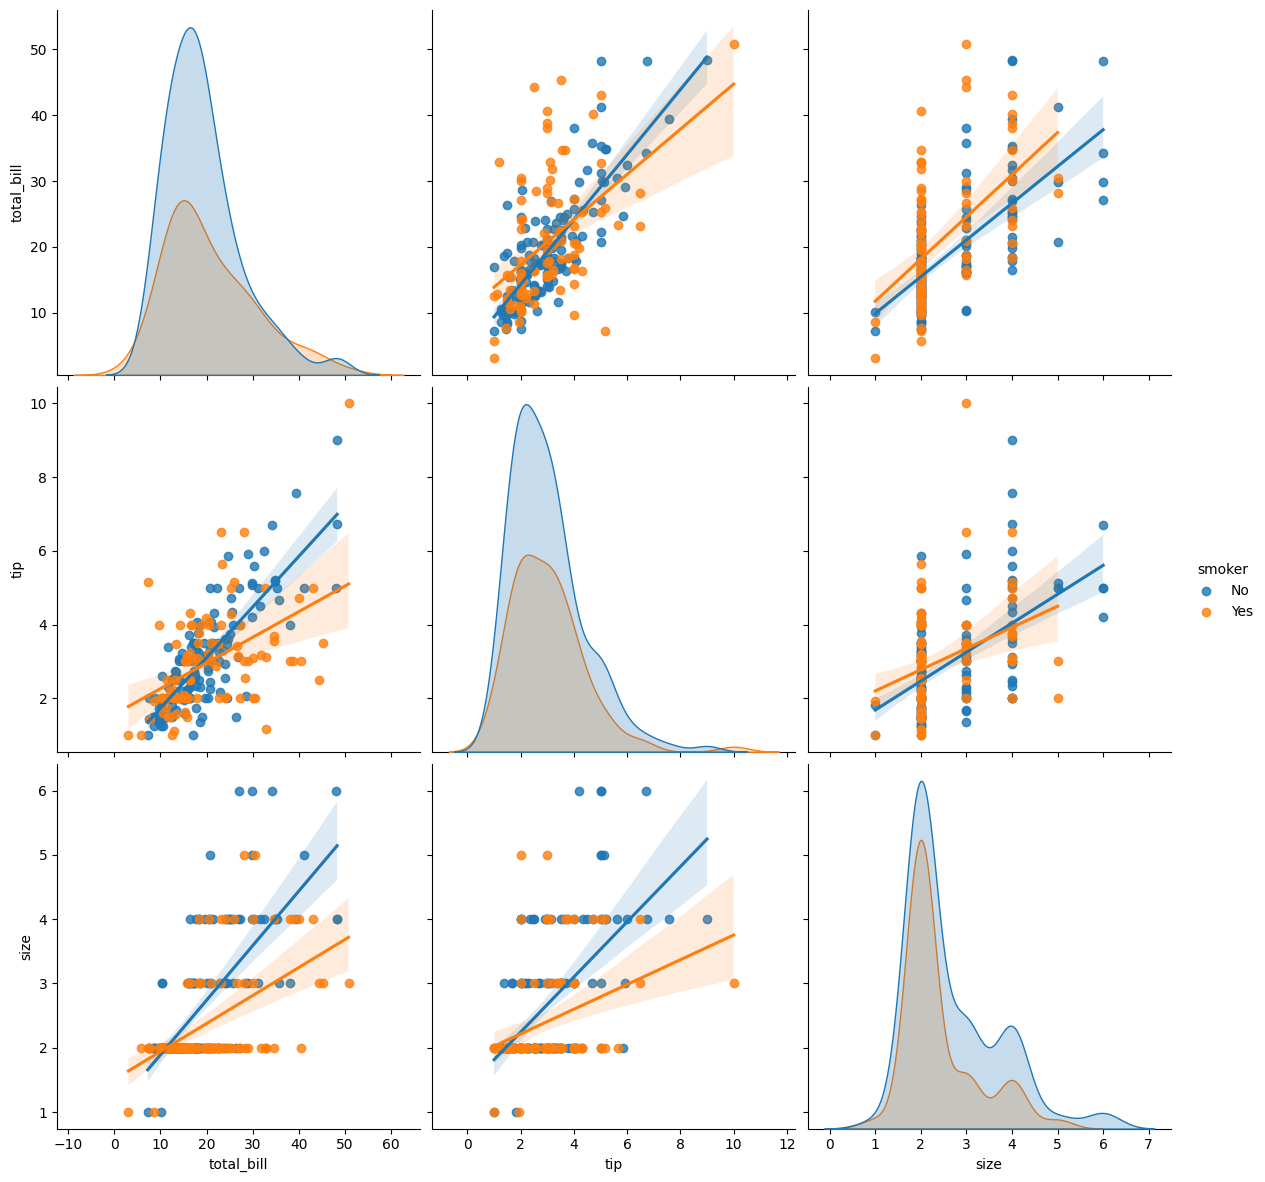

In [36]:
sns.pairplot(data=tips,kind="reg", size=4, hue="smoker")

In [37]:
X = tips[['total_bill', 'size']]
y = tips['tip']  # Variabile dipendente

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creare il modello di regressione lineare
model = LinearRegression()

# Adattare il modello ai dati di training
model.fit(X_train, y_train)

# Fare previsioni sui dati di test
y_pred = model.predict(X_test)

# Valutare il modello
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrare i risultati
print(f'Rout Mean Squared Error: {rmse}')
print(f'R^2: {r2}')

Rout Mean Squared Error: 0.8053568271607012
R^2: 0.4811084097989491


In [38]:
coefficients = model.coef_
intercept = model.intercept_

# Mostrare i risultati
print(f'Coefficiente 1: {coefficients[0]}')
print(f'Coefficiente 2: {coefficients[1]}')
print(f'Intercetta: {intercept}')

Coefficiente 1: 0.09088116781495417
Coefficiente 2: 0.2650175437880634
Intercetta: 0.5681370921350064


In [ ]:
#y=0.5681370921350064+0.09088116781495417x1+0.2650175437880634x2